# Bayesian Inference with PyMC3

In [14]:
import pymc3 as pm
import pandas as pd
import seaborn as sns
import numpy as np
import arviz as az

## A look at the values

In [6]:
tips = sns.load_dataset('tips')['tip'].values

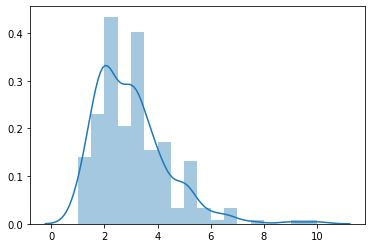

In [8]:
sns.distplot(tips)

In [20]:
tips.mean()

2.99827868852459

In [21]:
tips.std()

1.3807999538298954

# Bayesian parameter inference

## For the mean (and similarly std)
- start with Uniform prior which allows for possible means between 0 and 10
- the tips are assumed to follow a Normal distribution

## The sampling procedure
- start at any random value of the prior, say 3.
- make proposal: Metropolis alog proposes a random value from N(3, 1)
    - if likelihood of data under proposal-mu ($P(data | mu=proposal)$) is better than before ($P(data | mu=3)$), use the proposed mu as one sample from the posterior
    - if likelihood of data under proposal-mu is worse than before, the odds of **still making the step** and using the proposal as a sample from the posterior are the ratio of $P(data | mu=proposal) / P(data | mu=3)$. Thus the jump is less likely but possible
- Repeat. All "jumped-to" samples make up the histogram of the posterior 

In [18]:
with pm.Model():
    mu = pm.Uniform("Mean tip", 0, 10)
    sig = pm.Uniform("Std of tip", 0, 3)
    yobs = pm.Normal("yobs", mu=mu, sigma=sig, observed=tips)

    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [Std of tip, Mean tip]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:01<00:00, 1471.63it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37e3c6e890>,
      dtype=object)

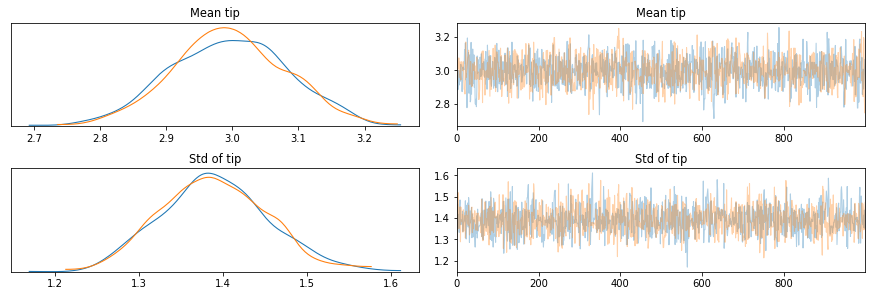

In [19]:
az.plot_trace(trace)

## Comparison with simple resampling approach

In [22]:
resamples = np.random.choice(tips, (1000, len(tips)))

In [23]:
means = resamples.mean(axis=1)
stds = resamples.std(axis=1)

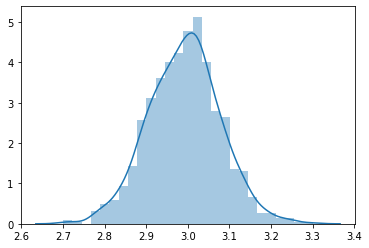

In [24]:
sns.distplot(means)

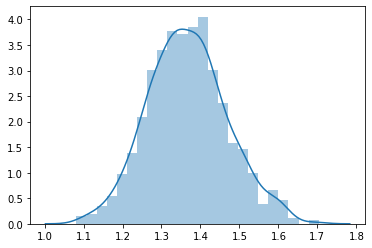

In [25]:
sns.distplot(stds)